In [18]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
# from vis_utils import *
import random
import h5py
import math
import torch.nn.functional as F

In [19]:
# Hyperparameters
num_epochs = 2
num_classes = 10
batch_size = 1
learning_rate = 0.001

DATA_PATH = 'MNIST'
MODEL_STORE_PATH = 'pytorch_model\\'

In [20]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [21]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [22]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [23]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(16384, 1000)
#         self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
#         print('shape, before fc1', out.shape)
        out = self.fc1(out)
#         out = self.fc2(out)
        out = F.relu(self.fc2(out))
        return out

In [24]:
model = ConvNet()

# Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()  # this is for regression mean squared loss

In [25]:
# # Train the model
# total_step = len(train_loader)
# loss_list = []
# acc_list = []
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # Run the forward pass
#         print(images.shape)
#         images = Variable(images.float())
#         print(images.shape)
#         print(images.type)
#         labels = Variable(labels)
#         print('labels')
#         print(labels)
#         print(labels.shape)
#         outputs = model(images)
#         loss = loss_func(outputs, labels)
#         loss_list.append(loss.item())

#         # Backprop and perform Adam optimisation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Track the accuracy
#         total = labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct = (predicted == labels).sum().item()
#         acc_list.append(correct / total)

#         if (i + 1) % 100 == 0:
#             print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
#                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
#                           (correct / total) * 100))

In [26]:
# print('Here is the size of the input images:', images.shape)
# print('Here is the size of the outputs:', outputs.shape)

In [27]:
import matplotlib.pyplot as plt
from PIL import Image


# plt.imshow(IMAGE)
# plt.show()

In [28]:
number_brains_train = 100
brains = []
for i in range(1, 1+number_brains_train):
    with h5py.File('../Brains/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        brains += [brain]

# columns = 2
# rows = 5

# fig=plt.figure(figsize=(20, 20))
# for i in range(1, 11):
#     brain = brains[i-1]
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(brain)
# plt.show()


In [29]:
resulting_brains = []
vars_ = []
number_brains_blurried = 10

for l in range(len(brains)):
    test_brain = brains[l]/1000
    resulting_brains.append(test_brain)
    vars_.append(0)
    for i in range(number_brains_blurried):
        var = 0
        changed_brain = np.copy(test_brain)
        for j in range(64):
            for k in range(64):
                value = changed_brain[k][j]
                add = np.random.randint(max(-value, -1000+100*i), 1000-100*i)/1000
                #print(changed_brain[k][j])
                changed_brain[k][j] = value + add
                #print(changed_brain[k][j])

                var = var + add/1000
        resulting_brains.append(changed_brain)
        vars_.append(var)

In [30]:
print(len(vars_))
print(len(resulting_brains))

print((test_brain/1000)[32][32])

1100
1100
0.001454


In [31]:
# labels_ = np.random.randint(1, 10, 10).reshape(10, 1)
# print(np.array(brains).shape)
# brains = np.array(brains).reshape(10, 1, 64, 64)
# print(labels_.shape, brains.shape)
# print(labels_)

vars_ = np.array(vars_).reshape(number_brains_train*(number_brains_blurried+1), 1)
resulting_brains = np.array(resulting_brains).reshape(number_brains_train*(number_brains_blurried+1), 1, 64, 64)

print(vars_.shape[0], vars_.shape)

1100 (1100, 1)


In [32]:
# Train the model
total_step = vars_.shape[0]
loss_list = []
acc_list = []
for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # Run the forward pass
#         images = Variable(images.float())
#         labels = Variable(labels)
#         outputs = model(images)
    for i in range(vars_.shape[0]):
        images = torch.from_numpy(resulting_brains[i].reshape(1, 1, 64, 64))
        images = Variable(images.float())

        labels = torch.from_numpy(vars_[i])
#         labels = Variable(labels.float())
#         labels = labels.float()
        outputs = model(images)
#         print('Out:', outputs)
#         print('Lab:', labels)
        loss = criterion(outputs, labels.float())
#         print('Loss:', loss)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

#         # Track the accuracy
#         total = labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct = (predicted == labels).sum().item()
#         acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/2], Step [100/1100], Loss: 0.3849
Epoch [1/2], Step [200/1100], Loss: 0.2222
Epoch [1/2], Step [300/1100], Loss: 0.0484
Epoch [1/2], Step [400/1100], Loss: 0.1084
Epoch [1/2], Step [500/1100], Loss: 0.0052
Epoch [1/2], Step [600/1100], Loss: 0.0169
Epoch [1/2], Step [700/1100], Loss: 0.0160
Epoch [1/2], Step [800/1100], Loss: 0.0780
Epoch [1/2], Step [900/1100], Loss: 0.1175
Epoch [1/2], Step [1000/1100], Loss: 0.0111
Epoch [1/2], Step [1100/1100], Loss: 0.0326
Epoch [2/2], Step [100/1100], Loss: 0.0059
Epoch [2/2], Step [200/1100], Loss: 0.0478
Epoch [2/2], Step [300/1100], Loss: 0.0354
Epoch [2/2], Step [400/1100], Loss: 0.0016
Epoch [2/2], Step [500/1100], Loss: 0.0736
Epoch [2/2], Step [600/1100], Loss: 0.0402
Epoch [2/2], Step [700/1100], Loss: 0.0011
Epoch [2/2], Step [800/1100], Loss: 0.0190
Epoch [2/2], Step [900/1100], Loss: 0.0000
Epoch [2/2], Step [1000/1100], Loss: 0.0001
Epoch [2/2], Step [1100/1100], Loss: 0.0001


In [33]:
resulting_brains_test = []
vars_test= []

brains_test = []
for i in range(len(brains), len(brains)+10):
    with h5py.File('../Brains/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        brains_test += [brain]

for l in range(len(brains_test)):
    test_brain = brains_test[l]/1000
    resulting_brains_test.append(test_brain)
    vars_test.append(0)
    for i in range(10):
        var = 0
        changed_brain = np.copy(test_brain)
        for j in range(64):
            for k in range(64):
                value = changed_brain[k][j]
                add = np.random.randint(max(-value, -1000+100*i), 1000-100*i)/1000
                #print(changed_brain[k][j])
                changed_brain[k][j] = value + add
                #print(changed_brain[k][j])

                var = var + add/1000
        resulting_brains_test.append(changed_brain)
        vars_test.append(var)

In [34]:
# Test the model
model.eval()
with torch.no_grad():
#     for images, labels in test_loader:
   for i in range(len(vars_test)):
        images = torch.from_numpy(resulting_brains_test[i].reshape(1, 1, 64, 64))
        images = Variable(images.float())
        outputs = model(images)
          
        print('OUT', outputs.data[0][0], 'REAL', vars_test[i])

OUT tensor(0.2237) REAL 0
OUT tensor(2.0041) REAL 2.0491809999999995
OUT tensor(1.8174) REAL 1.8430379999999995
OUT tensor(1.6091) REAL 1.6266749999999988
OUT tensor(1.4486) REAL 1.428879999999998
OUT tensor(1.2515) REAL 1.240374000000003
OUT tensor(1.0694) REAL 1.012704
OUT tensor(0.8844) REAL 0.8070690000000003
OUT tensor(0.6997) REAL 0.6070019999999987
OUT tensor(0.5329) REAL 0.40431700000000004
OUT tensor(0.3555) REAL 0.19795500000000157
OUT tensor(0.2670) REAL 0
OUT tensor(2.0062) REAL 2.0318840000000002
OUT tensor(1.8610) REAL 1.842448000000008
OUT tensor(1.6944) REAL 1.649273999999997
OUT tensor(1.4567) REAL 1.431440000000002
OUT tensor(1.3293) REAL 1.2304939999999984
OUT tensor(1.1418) REAL 1.020377000000001
OUT tensor(0.9150) REAL 0.8053330000000005
OUT tensor(0.7491) REAL 0.6004479999999984
OUT tensor(0.5701) REAL 0.4055240000000003
OUT tensor(0.4011) REAL 0.19952900000000107
OUT tensor(0.3117) REAL 0
OUT tensor(2.0785) REAL 2.065941000000001
OUT tensor(1.9137) REAL 1.8684009

In [35]:
test_input = resulting_brains_test[5]
test_input = torch.from_numpy(test_input.reshape(1, 1, 64, 64))
# test_input.requires_grad = True
# print()
test_input = Variable(test_input.float(), requires_grad=True)
test_output = model(test_input)  
test_output.backward(retain_graph=True)
print(test_output)
# test_output = Variable(test_output, requires_grad=True)
# test_output.requires_grad = True
print(test_output)
print(test_input)
d = torch.autograd.grad(test_output, test_input, allow_unused=True)
print(d)

tensor([[1.2515]], grad_fn=<ReluBackward0>)
tensor([[1.2515]], grad_fn=<ReluBackward0>)
tensor([[[[0.5030, 0.5490, 0.4560,  ..., 0.5380, 0.2950, 0.1700],
          [0.1240, 0.0640, 0.0610,  ..., 0.1910, 0.3210, 0.5990],
          [0.2210, 0.1260, 0.5620,  ..., 0.1530, 0.5190, 0.4260],
          ...,
          [0.0800, 0.4280, 0.3750,  ..., 0.5980, 0.2600, 0.5300],
          [0.3250, 0.3080, 0.1630,  ..., 0.5920, 0.1640, 0.1150],
          [0.4390, 0.5300, 0.0610,  ..., 0.5720, 0.2280, 0.5350]]]],
       requires_grad=True)
(tensor([[[[ 1.1370e-03, -2.4969e-04,  1.6930e-03,  ...,  1.2340e-03,
            6.2099e-04,  1.8441e-05],
          [ 5.2092e-04, -6.1690e-04,  7.7945e-04,  ..., -1.3919e-04,
           -1.2647e-03,  1.0206e-03],
          [-1.2582e-03,  9.6465e-05,  2.7836e-03,  ...,  6.3059e-04,
            3.1460e-03,  1.3244e-03],
          ...,
          [-9.4233e-04,  2.1281e-03,  2.7734e-03,  ...,  2.0847e-03,
           -6.9154e-04,  8.2919e-04],
          [ 1.1874e-03,  2.

In [36]:
print(d[0].shape)

torch.Size([1, 1, 64, 64])


In [37]:
# m = nn.Linear(2, 1)
# inputa = torch.ones(1, 2)
# inputa.requires_grad = True
# output = m(inputa).sum()
# output.backward(retain_graph=True)
# print(inputa.grad.data)

# print('INPUT:')
# print(inputa)
# print('OUTPUT:')
# print(output)
# print('LINEAR:')
# print(m)
# print('F(INPUT):', m(inputa))

In [38]:
# print(m.weight)
# print(torch.autograd.grad(output, inputa))

In [39]:
# test_input = resulting_brains_test[0]
# test_input = torch.from_numpy(test_input.reshape(1, 1, 64, 64))
# # test_input.requires_grad = True
# # print()
# test_input = Variable(test_input.float())
# test_output = model(test_input)  
# test_output.backward()
# print(test_output)
# # test_output.requires_grad = True

In [40]:
# print(test_input)

In [41]:
# d = torch.autograd.grad(test_output, test_input)

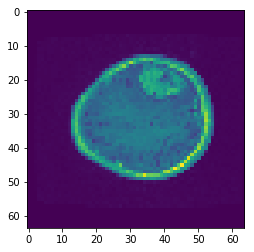

In [42]:
# GRADIENT DESCENT

with h5py.File('../Brains/%s.mat' %i, 'r') as f:
    brain = np.array(f['cjdata']['image'])
    brain = brain[::8, ::8]
    image_to_reconstruct = brain

plt.imshow(image_to_reconstruct)
plt.show()

In [43]:
import scipy.io
mat_90 = scipy.io.loadmat('thinL64_90')
print(mat_90['H'].todense())
print(mat_90['H'].todense().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8100, 4096)


In [44]:
A_90 = mat_90['H'].todense()
print(A_90.shape)

(8100, 4096)


In [45]:
p_90 = np.transpose(np.matmul(A_90, image_to_reconstruct.flatten()))

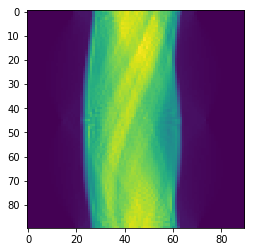

In [46]:
plt.imshow(p_90.reshape(90, 90))    
plt.show()

In [72]:
def f(x):
    global A_90
    p = np.transpose(np.matmul(A_90, np.transpose(x.flatten())))
    return p.reshape(90, 90)

def cost_function(x, y):
    return np.linalg.norm(f(x)-y.reshape(90, 90))
    
def grad_cost_function(x, y):
    global A_90
    U1 = np.matmul(np.transpose(A_90), np.transpose(f(x).flatten()))
#     print(y.flatten().shape)
    U2 = np.matmul(np.transpose(A_90), np.transpose(y.flatten()))
#     return (np.dot(np.transpose(A), f(x)) - np.dot(np.transpose(A), y))
    return U1.reshape(64, 64) - U2.reshape(64, 64)


In [138]:
itr = 1001
lr = 0.00001
cur_x_nn = np.random.rand(64, 64)
cur_x = np.random.rand(64, 64)


for i in range(itr+1):
    prev_x_nn = cur_x_nn
    prev_x = cur_x
    
    r_nn = grad_cost_function_nn(prev_x_nn, p_90)
    r = grad_cost_function(prev_x, p_90)
#     grad_rec = grad_cost_function(prev_x, p_90)
    
    cur_x = cur_x - lr * r
    cur_x_nn = cur_x_nn - lr * r
    
    
    if i%100 == 0:
        print('___________________________')
        print(cost_function_nn(cur_x_nn, p_90))
        print(cost_function(cur_x, p_90))
        print(i / ( itr - 1 ) * 100, '% done')
        # print(cur_x - original_list[color])

___________________________
tensor(1968970.8750, grad_fn=<AddBackward0>)
1968909.5456323058
0.0 % done
___________________________
tensor(301034., grad_fn=<AddBackward0>)
300784.69641088706
10.0 % done
___________________________
tensor(170160.4844, grad_fn=<AddBackward0>)
170036.11523898758
20.0 % done
___________________________
tensor(124849.8281, grad_fn=<AddBackward0>)
124759.42873410709
30.0 % done
___________________________
tensor(98980.9531, grad_fn=<AddBackward0>)
98905.3274908661
40.0 % done
___________________________
tensor(81347.1797, grad_fn=<AddBackward0>)
81279.08777790339
50.0 % done
___________________________
tensor(68425.9922, grad_fn=<AddBackward0>)
68362.26287662356
60.0 % done
___________________________
tensor(58551.6875, grad_fn=<AddBackward0>)
58490.86988816092
70.0 % done
___________________________
tensor(50787.4453, grad_fn=<AddBackward0>)
50728.59219877285
80.0 % done
___________________________
tensor(44551.5352, grad_fn=<AddBackward0>)
44494.22845413961

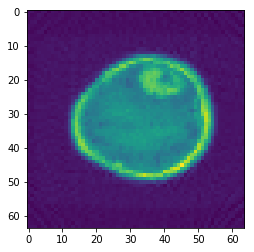

In [139]:
plt.imshow(cur_x.reshape(64, 64))
plt.show()

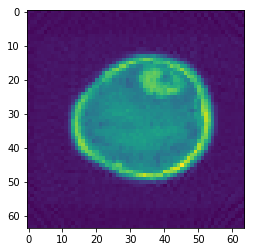

In [140]:
plt.imshow(cur_x_nn.reshape(64, 64))
plt.show()

In [136]:
print(cur_x[0])
print(cur_x_nn[0])

[[  9.31483031  34.68563673 -16.1499381  -32.96129844  35.63055707
   32.68721989 -57.11311762  20.54021244   8.9746534  -27.39903975
   40.33301859  -1.17853577 -18.42979077   6.06967833  12.79232919
   12.66741421  -7.43676888 -10.25555636 -27.59191106  35.21688758
   20.1569935  -28.87607475  19.32540042  29.58323711 -22.77524426
  -25.49577805  27.55939188   9.64182696  17.23984398  31.02724252
  -22.91406995 -25.2708475   -9.15679236  16.15278585   1.13974607
   28.94375439  24.41205522 -11.87767933 -22.3902923    8.07161159
   40.83954406  -9.08667623  13.01877518 -32.95653138  32.39581563
  -61.31355777  34.60498019   3.93330087  17.71127163   2.08695897
  -21.44857341   1.4362238   18.93660098 -29.30834505  21.09432376
   -5.53982451  16.94151917  40.45450231 -33.82187456 -37.62581734
   29.79734753  40.75040685 -67.40853868  39.7917682 ]]
[[  9.81365545  34.77242718 -15.73808639 -32.50386214  35.56999832
   32.91747852 -57.15794974  20.19726594   9.35774348 -27.69925658
   39.

In [137]:
nn_importance = 1000

def f(x):
    global A_90
    p = np.transpose(np.matmul(A_90, np.transpose(x.flatten())))
    return p.reshape(90, 90)

def cost_function_nn(x, y):
    global nn_importance
    nn_input = torch.from_numpy((x/1000).reshape(1, 1, 64, 64))
#     print(nn_input.view(1, 1, 64, 64).shape)
    nn_input = Variable(nn_input.float(), requires_grad=True)
    nn_output = model(nn_input.view(1, 1, 64, 64))
#     print('xxx')
#     print(np.linalg.norm(f(x)-y.reshape(90, 90)))
#     print(nn_importance * nn_output[0][0])
#     print('xxx')
    return np.linalg.norm(f(x)-y.reshape(90, 90)) + nn_importance * nn_output[0][0]
    
def grad_cost_function_nn(x, y):
    global A_90
    global nn_importance
    U1 = np.matmul(np.transpose(A_90), np.transpose(f(x).flatten()))
#     print(y.flatten().shape)
    U2 = np.matmul(np.transpose(A_90), np.transpose(y.flatten()))
#     return (np.dot(np.transpose(A), f(x)) - np.dot(np.transpose(A), y))

    nn_input = torch.from_numpy((x/1000).reshape(1, 1, 64, 64))
    nn_input = Variable(nn_input.float(), requires_grad=True)
    nn_output = model(nn_input.view(1, 1, 64, 64))
    nn_output.backward(retain_graph=True)
    d = torch.autograd.grad(nn_output, nn_input, allow_unused=True)
#     print(d[0].shape)
    if d[0].shape == torch.Size([1, 1, 64, 64]):
        d = d[0][0][0]
    else:
        d = d[0]
    return U1.reshape(64, 64) - U2.reshape(64, 64) + nn_importance * d.numpy()
